#### Polynomial regression for trq_margin

##### LinearRegression

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Caricamento dei dati da CSV
X_train_target = pd.read_csv('Dataset/Train/X_train_resampled_with_target.csv')

# 2. Selezioniamo solo la colonna 'trq_target' come target
y = X_train_target['trq_target'].values

# 3. Creiamo la matrice delle caratteristiche (escludiamo 'trq_measured')
X = X_train_target.drop(columns=['trq_measured', 'trq_target'])

# 4. Suddivisione dei dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Creazione del modello di regressione lineare
model = LinearRegression()

# 6. Addestramento del modello
print("Inizio dell'addestramento del modello di regressione lineare...")
model.fit(X_train, y_train)

# 7. Predizione
y_pred = model.predict(X_test)

# 8. Valutazione
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')

Inizio dell'addestramento del modello di regressione lineare...
Mean Squared Error: 0.6378179402391422
R^2: 0.5021571017282549


##### Grid Search

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Caricamento dei dati
X_train_target = pd.read_csv('Dataset/Train/X_train_resampled_with_target.csv')

# Selezioniamo la variabile target e le feature
y = X_train_target['trq_target']
X = X_train_target.drop(columns=['trq_measured', 'trq_target'])

# Suddividiamo il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Parametri per la Regressione Lineare
lr_param_grid = {
    'fit_intercept': [True, False]
}

# Inizializzazione del modello
lr_model = LinearRegression()

# Eseguiamo la GridSearch
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

# Visualizza i migliori parametri trovati
print(f"Migliori parametri per la Regressione Lineare: {grid_search_lr.best_params_}")

# Predizione e valutazione
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Mean Squared Error per la Regressione Lineare: {mse_lr}')
print(f'R^2 per la Regressione Lineare: {r2_lr}')

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Migliori parametri per la Regressione Lineare: {'fit_intercept': False}
Mean Squared Error per la Regressione Lineare: 0.6378162318363662
R^2 per la Regressione Lineare: 0.502158435206252


In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Parametri per il Decision Tree Regressor
dt_param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

# Inizializzazione del modello
dt_model = DecisionTreeRegressor(random_state=42)

# Eseguiamo la GridSearch
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)

# Visualizza i migliori parametri trovati
print(f"Migliori parametri per il Decision Tree Regressor: {grid_search_dt.best_params_}")

# Predizione e valutazione
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Mean Squared Error per il Decision Tree Regressor: {mse_dt}')
print(f'R^2 per il Decision Tree Regressor: {r2_dt}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Migliori parametri per il Decision Tree Regressor: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Mean Squared Error per il Decision Tree Regressor: 0.21345672434772667
R^2 per il Decision Tree Regressor: 0.833388326667291


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Parametri per il Random Forest Regressor
rf_param_grid = {
    #'n_estimators': [100, 200, 300],
    'n_estimators': [100],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Inizializzazione del modello
rf_model = RandomForestRegressor(random_state=42)

# Eseguiamo la GridSearch
#grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Visualizza i migliori parametri trovati
print(f"Migliori parametri per il Random Forest Regressor: {grid_search_rf.best_params_}")

# Predizione e valutazione
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error per il Random Forest Regressor: {mse_rf}')
print(f'R^2 per il Random Forest Regressor: {r2_rf}')

Fitting 3 folds for each of 81 candidates, totalling 243 fits


KeyboardInterrupt: 

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Parametri per il Random Forest Regressor
rf_param_grid = {
    #'n_estimators': [100, 200, 300],
    'n_estimators': [300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Inizializzazione del modello
rf_model = RandomForestRegressor(random_state=42)

# Eseguiamo la GridSearch
#grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Visualizza i migliori parametri trovati
print(f"Migliori parametri per il Random Forest Regressor: {grid_search_rf.best_params_}")

# Predizione e valutazione
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error per il Random Forest Regressor: {mse_rf}')
print(f'R^2 per il Random Forest Regressor: {r2_rf}')

Fitting 3 folds for each of 81 candidates, totalling 243 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Parametri per il Random Forest Regressor
rf_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],  # None significa che non viene imposta alcuna profondità massima
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inizializzazione del modello
rf_model = RandomForestRegressor(random_state=42)

# Eseguiamo la RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=rf_param_dist, 
    n_iter=50,  # Numero di combinazioni casuali da esplorare
    cv=3, 
    n_jobs=-1,  # Utilizza tutti i core disponibili
    verbose=2, 
    random_state=42
)

# Esegui la RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Visualizza i migliori parametri trovati
print(f"Migliori parametri per il Random Forest Regressor: {random_search_rf.best_params_}")

# Predizione e valutazione
best_rf_model = random_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error per il Random Forest Regressor: {mse_rf}')
print(f'R^2 per il Random Forest Regressor: {r2_rf}')

In [9]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Parametri per l'XGBoost Regressor
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Inizializzazione del modello
xgb_model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

# Eseguiamo la GridSearch
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

# Visualizza i migliori parametri trovati
print(f"Migliori parametri per l'XGBoost Regressor: {grid_search_xgb.best_params_}")

# Predizione e valutazione
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Mean Squared Error per l\'XGBoost Regressor: {mse_xgb}')
print(f'R^2 per l\'XGBoost Regressor: {r2_xgb}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Migliori parametri per l'XGBoost Regressor: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Mean Squared Error per l'XGBoost Regressor: 0.17326962140503294
R^2 per l'XGBoost Regressor: 0.864755998443087


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Parametri per il Polynomial Regressor
poly_param_grid = {
    'polynomialfeatures__degree': [2, 3, 4],  # Grado del polinomio
    'linearregression__fit_intercept': [True, False],  # Se includere l'intercetta nel modello
}

# Creiamo un modello che include il PolynomialFeatures seguito dalla Regressione Lineare
poly_model = make_pipeline(
    PolynomialFeatures(),
    LinearRegression()
)

# Eseguiamo la GridSearch
grid_search_poly = GridSearchCV(estimator=poly_model, param_grid=poly_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_poly.fit(X_train, y_train)

# Visualizza i migliori parametri trovati
print(f"Migliori parametri per il Regressore Polinomiale: {grid_search_poly.best_params_}")

# Predizione e valutazione
best_poly_model = grid_search_poly.best_estimator_
y_pred_poly = best_poly_model.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Mean Squared Error per il Regressore Polinomiale: {mse_poly}')
print(f'R^2 per il Regressore Polinomiale: {r2_poly}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Migliori parametri per il Regressore Polinomiale: {'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 4}
Mean Squared Error per il Regressore Polinomiale: 0.33835936739139727
R^2 per il Regressore Polinomiale: 0.7358967230423635


##### Random Forest Regressor

Inizio dell'addestramento del modello Random Forest...
Mean Squared Error: 0.18304701080264646
R^2: 0.8571243475155288


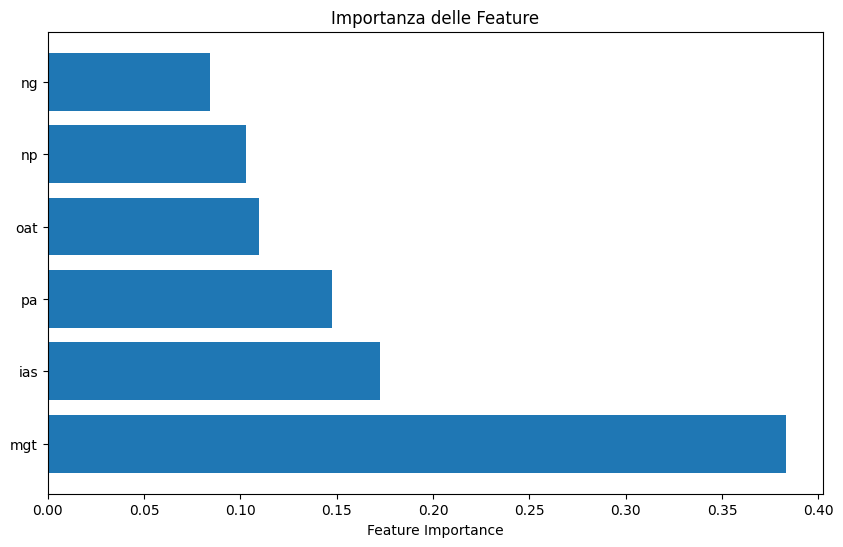

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Caricamento dei dati
X_train_target = pd.read_csv('Dataset/Train/X_train_resampled_with_target.csv')

# Selezioniamo la variabile target e le feature
y = X_train_target['trq_target']
X = X_train_target.drop(columns=['trq_measured', 'trq_target'])

# Suddividiamo il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creazione del modello Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Addestramento del modello
print("Inizio dell'addestramento del modello Random Forest...")
rf_model.fit(X_train, y_train)

# Predizione sui dati di test
y_pred = rf_model.predict(X_test)

# Calcolo degli errori
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')

# Visualizzazione della feature importance
import matplotlib.pyplot as plt
import numpy as np

feature_importance = rf_model.feature_importances_
indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), feature_importance[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Importanza delle Feature')
plt.show()

## Support Vector Regression (SVR)

Inizio dell'addestramento del modello SVR...
Mean Squared Error: 0.18304701080264646
R^2: 0.8571243475155288


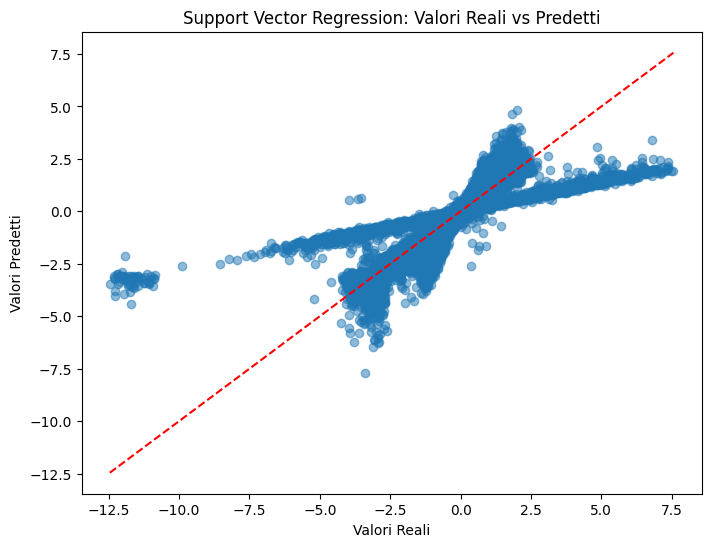

In [3]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt


# Addestramento del modello
print("Inizio dell'addestramento del modello SVR...")
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Predizione sui dati di testt
y_pred_scaled = svr_model.predict(X_test)

# Calcolo degli errori
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valori Reali')
plt.ylabel('Valori Predetti')
plt.title('Support Vector Regression: Valori Reali vs Predetti')
plt.show()